Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                      

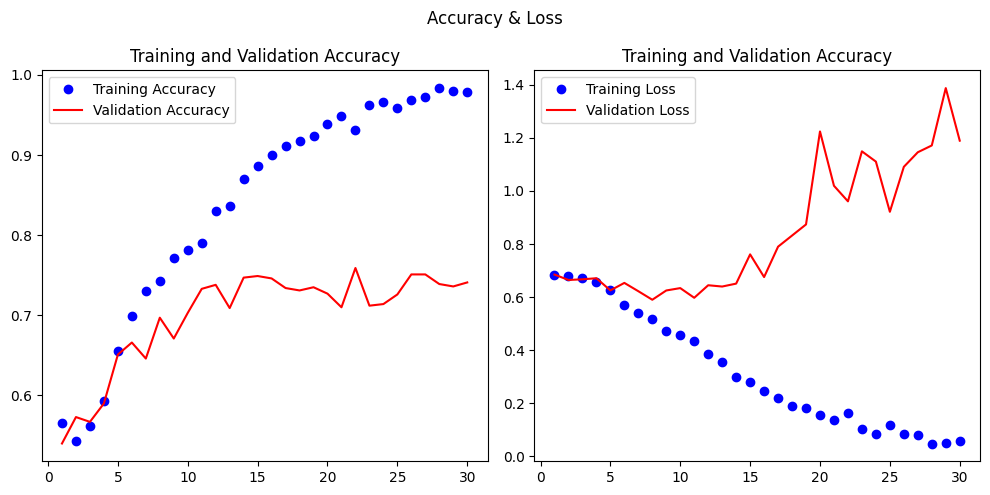

In [1]:
from keras.backend import learning_phase
#강아지 사진들, 실제 파일 데이터로 CNN

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/python/tensorflow/song/train',
    target_size = (150, 150),
    batch_size =20,
    class_mode = 'binary'
)

valid_generator = test_datagen.flow_from_directory(
    '/python/tensorflow/song/test',
     target_size = (150, 150),
    batch_size =20,
    class_mode = 'binary'    
)
    

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

model.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.Adam(learning_rate = 0.001),
    metrics=['acc']
)


history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs = 30,
    validation_data = valid_generator,
    validation_steps = 50
)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.suptitle('Accuracy & Loss')
plt.tight_layout()

plt.show()


In [5]:
import os

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range =0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip=True,
    fill_mode='nearest'
    )

from keras.preprocessing import image

fnames = sorted([os.path.join('/python/tensorflow/song/train/cats', fname)
for fname in os.listdir('/python/tensorflow/song/train/cats')])
img_path = fnames[7]

img = image.load_img(img_path, target_size = (150, 150))

x = image.img_to_array(img)
x = x.reshape((1.)+x.shape)

plt.figure(figsize=(5,5))
i = 1
for batch in datagen.flow(x, batch_size=1):
  plt.subplot(2,2,i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  plt.xticks([])
  plt.yticks([])
  i += 1
  if i == 5 : break
plt.tight_layout()
plt.show()



TypeError: unsupported operand type(s) for +: 'float' and 'tuple'